In [19]:
# scraping a discussion forum using requests and xpath to extract data:
# https://debatepolitics.com/forums/2024-us-presidential-election.227/
# 2024 US Presidential Election

import requests
from lxml import html

### Scraping a Single Page

In [3]:
# link to the discussion forum
url = 'https://debatepolitics.com/forums/2024-us-presidential-election.227/'
# request the link
page = requests.get(url)
# parse the html
tree = html.fromstring(page.content)    # Converts the HTML content into a structured tree format, allowing you to navigate and extract specific elements using XPath.

page.status_code

200

In [5]:
# extract titles of all articles on the page:
titles = tree.xpath('//div[@class="structItem-title"]/a/text()')
titles = [title.strip() for title in titles]
titles

['For some Latinos, ‘prosperity gospel’ led them to Trump',
 'How the GOP is on Self-Destruct',
 "Kamala's Been On A Drinking Binge Since Losing",
 'The Victory',
 'It Must Really Suck For You People',
 'Manifestly Unfit',
 "Poll: 65% of Canadians agree with Trump's wish to make them the 51st state",
 'President Trump - Meet the Press... "No I will not do any executive orders to limit abortion"',
 "Trumps fake campaign promises are falling like dominoes or cut like a drug dealer's cocaine. Election fraud is consequential & criminal.",
 "TRUMP RENEGES ON THE USMCA - HIS OWN ADMINISTRATION'S TRADE AGREEMENT NEGOTIATED & SIGNED IN 2020",
 "Trump's inaugural fund receives $1 million donation from Mark Zuckerberg's Meta",
 'Now It’s Panama’s Turn In the Barrel',
 'You know its very hard. LOL',
 "Western Kentucky Professor: Trump's victory signals that human decency is no longer an American virtue",
 'Fetterman slams legal cases against Trump, Hunter Biden in first Truth Social post: ‘Cases 

In [7]:
# extract urls of the titles
urls = tree.xpath('//div[@class="structItem-title"]/a/@href')
urls = [url.strip() for url in urls]
urls

['/threads/for-some-latinos-%E2%80%98prosperity-gospel%E2%80%99-led-them-to-trump.557926/',
 '/threads/how-the-gop-is-on-self-destruct.557954/',
 '/threads/kamalas-been-on-a-drinking-binge-since-losing.556181/',
 '/threads/the-victory.554963/',
 '/threads/it-must-really-suck-for-you-people.557448/',
 '/threads/manifestly-unfit.557682/',
 '/threads/poll-65-of-canadians-agree-with-trumps-wish-to-make-them-the-51st-state.557506/',
 '/threads/president-trump-meet-the-press-no-i-will-not-do-any-executive-orders-to-limit-abortion.556927/',
 '/threads/trumps-fake-campaign-promises-are-falling-like-dominoes-or-cut-like-a-drug-dealers-cocaine-election-fraud-is-consequential-criminal.557303/',
 '/threads/trump-reneges-on-the-usmca-his-own-administrations-trade-agreement-negotiated-signed-in-2020.557839/',
 '/threads/trumps-inaugural-fund-receives-1-million-donation-from-mark-zuckerbergs-meta.557111/',
 '/threads/now-it%E2%80%99s-panama%E2%80%99s-turn-in-the-barrel.557723/',
 '/threads/you-know-i

In [9]:
# add the base url to the urls:
urls = ['https://debatepolitics.com' + url for url in urls]
urls

['https://debatepolitics.com/threads/for-some-latinos-%E2%80%98prosperity-gospel%E2%80%99-led-them-to-trump.557926/',
 'https://debatepolitics.com/threads/how-the-gop-is-on-self-destruct.557954/',
 'https://debatepolitics.com/threads/kamalas-been-on-a-drinking-binge-since-losing.556181/',
 'https://debatepolitics.com/threads/the-victory.554963/',
 'https://debatepolitics.com/threads/it-must-really-suck-for-you-people.557448/',
 'https://debatepolitics.com/threads/manifestly-unfit.557682/',
 'https://debatepolitics.com/threads/poll-65-of-canadians-agree-with-trumps-wish-to-make-them-the-51st-state.557506/',
 'https://debatepolitics.com/threads/president-trump-meet-the-press-no-i-will-not-do-any-executive-orders-to-limit-abortion.556927/',
 'https://debatepolitics.com/threads/trumps-fake-campaign-promises-are-falling-like-dominoes-or-cut-like-a-drug-dealers-cocaine-election-fraud-is-consequential-criminal.557303/',
 'https://debatepolitics.com/threads/trump-reneges-on-the-usmca-his-own-a

In [11]:
# extract number of replies:
replies = tree.xpath('//div[@class="structItem-cell structItem-cell--meta"]/dl[1]/dd/text()')
# replies = tree.xpath('//div[@class="structItem-cell structItem-cell--meta"]/dl[@class="pairs pairs--justified"]/dd/text()')
replies = [reply.strip() for reply in replies]

# convert replies to numbers:
replies = [int(reply) for reply in replies]
replies

[48,
 2,
 187,
 182,
 290,
 129,
 56,
 72,
 36,
 12,
 54,
 133,
 281,
 363,
 85,
 29,
 81,
 53,
 32,
 41]

In [13]:
# extract number of views:
views = tree.xpath('//div[@class="structItem-cell structItem-cell--meta"]/dl[2]/dd/text()')
views = [view.strip() for view in views]
views

['2K',
 '174',
 '2K',
 '2K',
 '2K',
 '1K',
 '775',
 '938',
 '587',
 '298',
 '533',
 '2K',
 '2K',
 '3K',
 '876',
 '332',
 '750',
 '535',
 '485',
 '455']

In [15]:
# replace K with 1000:
views = [int(view.replace('K', '000')) for view in views]
views

[2000,
 174,
 2000,
 2000,
 2000,
 1000,
 775,
 938,
 587,
 298,
 533,
 2000,
 2000,
 3000,
 876,
 332,
 750,
 535,
 485,
 455]

In [17]:
# put them into a dataframe:
import pandas as pd
df = pd.DataFrame({'title': titles, 'url': urls, 'replies': replies, 'views':views})
df.head(25)

,title,url,replies,views
0,"For some Latinos, ‘prosperity gospel’ led them...",https://debatepolitics.com/threads/for-some-la...,48,2000
1,How the GOP is on Self-Destruct,https://debatepolitics.com/threads/how-the-gop...,2,174
2,Kamala's Been On A Drinking Binge Since Losing,https://debatepolitics.com/threads/kamalas-bee...,187,2000
3,The Victory,https://debatepolitics.com/threads/the-victory...,182,2000
4,It Must Really Suck For You People,https://debatepolitics.com/threads/it-must-rea...,290,2000
5,Manifestly Unfit,https://debatepolitics.com/threads/manifestly-...,129,1000
6,Poll: 65% of Canadians agree with Trump's wish...,https://debatepolitics.com/threads/poll-65-of-...,56,775
7,"President Trump - Meet the Press... ""No I will...",https://debatepolitics.com/threads/president-t...,72,938
8,Trumps fake campaign promises are falling like...,https://debatepolitics.com/threads/trumps-fake...,36,587
9,TRUMP RENEGES ON THE USMCA - HIS OWN ADMINISTR...,https://debatepolitics.com/threads/trump-reneg...,12,298


### Scraping Multiple Pages

In [24]:
# define a function to get thread data:
def get_threads(url):
    tree = html.fromstring(requests.get(url).content)
    titles = tree.xpath('//div[@class="structItem-title"]/a/text()')
    urls = ['https://debatepolitics.com' + url for url in tree.xpath('//div[@class="structItem-title"]/a/@href')]
    replies = tree.xpath('//div[@class="structItem-cell structItem-cell--meta"]/dl[1]/dd/text()')
    replies = [reply.strip() for reply in replies]
    replies = [int(reply.replace('K', '000')) for reply in replies]
    views = tree.xpath('//div[@class="structItem-cell structItem-cell--meta"]/dl[2]/dd/text()')
    views = [view.strip() for view in views]
    views = [int(view.replace('K', '000')) for view in views]
    return pd.DataFrame({'title': titles, 'url': urls, 'replies': replies, 'views':views})

In [30]:
# Using the function to get more than 10 pages:
threads = pd.DataFrame(columns=['title','url','replies','views'])
for i in range(1, 5):
# USE: for i in range(len(titles)):  if you want to scrape all the 63 pages. 
    url = 'https://debatepolitics.com/forums/2024-us-presidential-election.227/page-'+str(i)
    threads = pd.concat([threads, get_threads(url)], ignore_index=True)
threads.head(25)

# This example is actually a special case, because it follows the pattern of page-1, page-2, page-3, which can be relatively easily coded.  

,title,url,replies,views
0,"For some Latinos, ‘prosperity gospel’ led them...",https://debatepolitics.com/threads/for-some-la...,48,2000
1,How the GOP is on Self-Destruct,https://debatepolitics.com/threads/how-the-gop...,2,174
2,Kamala's Been On A Drinking Binge Since Losing,https://debatepolitics.com/threads/kamalas-bee...,187,2000
3,The Victory,https://debatepolitics.com/threads/the-victory...,182,2000
4,It Must Really Suck For You People,https://debatepolitics.com/threads/it-must-rea...,290,2000
5,Manifestly Unfit,https://debatepolitics.com/threads/manifestly-...,129,1000
6,Poll: 65% of Canadians agree with Trump's wish...,https://debatepolitics.com/threads/poll-65-of-...,56,775
7,"President Trump - Meet the Press... ""No I will...",https://debatepolitics.com/threads/president-t...,72,938
8,Trumps fake campaign promises are falling like...,https://debatepolitics.com/threads/trumps-fake...,36,587
9,TRUMP RENEGES ON THE USMCA - HIS OWN ADMINISTR...,https://debatepolitics.com/threads/trump-reneg...,12,298


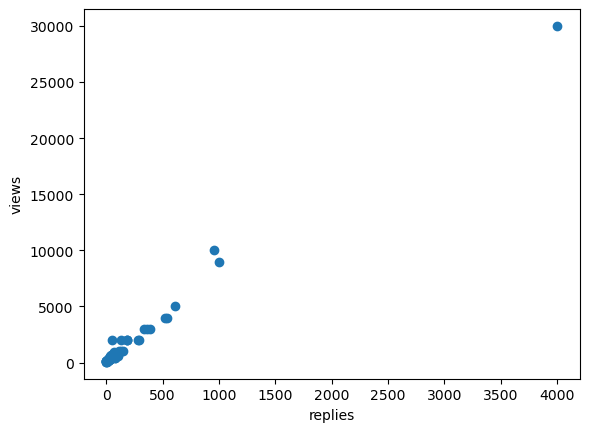

In [27]:
# using matplotlib to plot the data:
import matplotlib.pyplot as plt
plt.scatter(threads['replies'], threads['views'])
plt.xlabel('replies')
plt.ylabel('views')
plt.show()

In [22]:
threads.to_csv('/Users/kaiyang/Desktop/threads.csv', index=False)